# **Rodrigo_Mesquita_DR1_TP1**
### **Inteligência Artificial: Model LifeCycle [24E1_1]**

# Exercício 1: Explicação Básica

### Escreva um parágrafo explicando o que é Machine Learning e por que é útil em diversas aplicações do mundo real.

É uma área da computação de desenvolvimento de algoritmos e modelos que permitem aos computadores aprenderem com os dados e identificar padrões complexos, sem serem explicitamente programados para isso.

ML permite automatizar tarefas complexas, melhorar processos e tomar decisões baseadas em dados de forma mais eficiente e precisa. Por exemplo, auxiliando em diagnósticos médicos, identificando padrões em exames de imagem, recomendado filmes e produtos ou identificando fraudes.

# Exercício 2: Tipos de Machine Learning

### Liste e explique brevemente os dois principais tipos de Machine Learning: Aprendizado Supervisionado e Não-Supervisionado.

Aprendizado Supervisionado: Nestes cases de ML, há um conjunto de dados rotulados, ou seja, informações fornecidas ao modelo para que ele consiga aprender, e assim possa replicar o mesmo comportamento para novos dados, realizando predições.

Aprendizado Não-Supervisionado: Nestes cases, não há dados rotulados, então o algoritmo precisa encontrar padrões dentre os dados fornecidos por conta própria. Ele agrupa os dados de acordo com suas similaridades ou diferenças, sem saber de fato qual o rótulo verdadeiro de cada grupo identificado.

# Exercício 3: Bibliotecas de Python para Machine Learning

### Enunciado: Pesquise e liste cinco bibliotecas de Python 3 que são comumente usadas em Machine Learning, destacando a importância do Scikit-Learn.

Podemos destacar 5 bibliotecas importantes do Python: Pandas, Matplotlib, Seaborn, NumPy, Scikit-Learn.

O Scikit-Learn oferece uma grande variedade de algoritmos de aprendizado supervisionado e não supervisionado, além de ferramentas para pré-processamento de dados, avaliação de modelos e seleção de features. Sendo eficiente e de fácil uso.

# Exercício 4: Aprendizado Baseado em Instâncias vs Modelos

### Explique a diferença entre aprendizado baseado em instâncias e aprendizado baseado em modelos, dando um exemplo de cada um.

No aprendizado baseado em instâncias, o modelo faz previsões com base na similaridade entre novos dados e os dados de treinamento, sem criar um modelo geral abstraindo os dados originais, como no caso do KNN. Já no aprendizado baseado em modelos, um modelo é criado a partir dos dados de treinamento para fazer previsões sobre novos dados, como na regressão linear, onde o modelo busca representar os padrões subjacentes nos dados para realizar previsões.

# Exercício 5: Desafios em Machine Learning

### Enumere e descreva três desafios comuns enfrentados ao criar modelos de Machine Learning.

Pré-tratamento de dados: Garantir que os dados de tenham qualidade o suficiente para garantir que o modelo consiga ser executado corretamente, como por exemplo, analisando se há dados nulos, outliers, diferença de escalas ou se o conjunto de treino está balanceado.

Seleção de Features: Conseguir identificar quais as melhores features do conjunto de dados para que sejam passadas no treinamento do modelo. Para isto é necessário conhecer sobre o negócio para identificar a relevância de cada informação, analisar a qualidade dos dados que estão presentes em cada features, conseguir encontrar o equilíbrio entre selecionar mais features que o necessário, aumentando desnecessariamente a complexidade do modelo, ou menos que o necessário, prejudicando a capacidade de aprendizagem.

Overfitting e Underfitting: Também é necessário encontrar o equilíbrio correto durante o treinamento do modelo, de forma que não se ajuste demais aos dados de treino, não conseguindo generalizar bem para novos dados (overfitting), nem que o modelo seja simples demais a ponto de não conseguir capturar a complexidade dos dados (underfitting).

# Exercício 6: Análise de Dados dos Pinguins

### Acesse a base de dados "Pinguins" disponível em PalmerPenguins GitHub. Identifique as 'features' e o 'target' na base de dados.

Features: comprimento do bico, profundidade do bico, comprimento da asa, massa corporal, sexo e ilha.

Target: Espécie

# Exercício 7: Preparando os Dados

### Com a base de dados "Pinguins", escreva um código em Python para separar os dados em conjuntos de treino e validação.

In [ ]:
!pip install palmerpenguins

In [ ]:
import pandas as pd
import seaborn as sns
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt

from palmerpenguins import load_penguins
from sklearn.preprocessing import Normalizer
from sklearn.compose   import  ColumnTransformer
from sklearn.pipeline   import Pipeline
from sklearn.impute   import SimpleImputer
from sklearn.preprocessing   import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler


In [ ]:
df = load_penguins()

#Convertendo as espécies para categorias, para nos auxiliar na classificação
df['species'] = df['species'].astype('category')
df['species'] = df['species'].cat.codes

In [ ]:

x = df[['bill_length_mm',	'flipper_length_mm']] #Variáveis independentes
y = df[['species']] #Variável Target

#75% para treino, 25% para teste
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=2)

# Exercício 8: Construção do Modelo Inicial

### Enunciado: Utilizando a biblioteca Scikit-Learn, escreva um código em Python para construir um modelo de Machine Learning usando o algoritmo de K-Nearest Neighbors com a base de dados "Pinguins".

In [ ]:
#Separar features numéricas e categóricas
x_train_num = x_train.iloc[:,:4]
x_train_cat = x_train.iloc[:,4:6]

#Definir as transformações a serem aplicadas para tratamento de valores nulos e para codificar as features categóricas
num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='mean'))])

cat_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preproc_pipeline_x = ColumnTransformer([
    ("num", num_pipeline, x_train_num.columns),
    ("cat", cat_pipeline, x_train_cat.columns)], remainder = 'passthrough')

#Dar o fit usando o conjunto de treino e o transform no treino e teste.
x_train_transf = preproc_pipeline_x.fit_transform(x_train)
x_test_transf = preproc_pipeline_x.transform(x_test)

In [ ]:
#treinar o modelo, calcular score e acurácia.

valor_k = list(range(3,40,2))
score = []
acuracia = []
for k in valor_k:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(x_train_transf, y_train.values.ravel())
    y_pred = knn.predict(x_test_transf)
    score.append(np.mean(y_test.values.ravel() != y_pred))
    acuracia.append(metrics.accuracy_score(y_test.values.ravel(),y_pred))


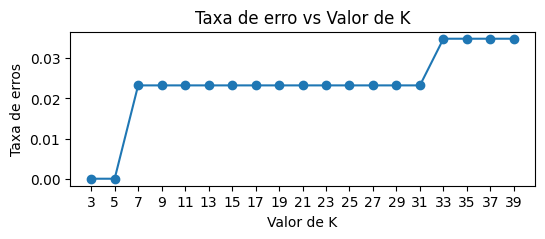

In [ ]:
plt.figure(figsize=(6, 2))
plt.plot(valor_k, score, marker='o')
plt.title('Taxa de erro vs Valor de K')
plt.ylabel('Taxa de erros')
plt.xlabel('Valor de K')
plt.xticks(valor_k)
plt.show()

# Exercício 9: Avaliação do Modelo

### Enunciado: Após treinar o modelo de K-Nearest Neighbors com a base de dados "Pinguins", escreva um código para avaliar a acurácia do seu modelo nos dados de validação.

In [ ]:
df_acuracia = pd.DataFrame({'k': valor_k, 'Acuracia': acuracia})

In [ ]:
#identificando o valor de K que obteve a maior acurácia
linha_maior_acuracia = df_acuracia.loc[df_acuracia['Acuracia'].idxmax()]
linha_maior_acuracia

k           3.0
Acuracia    1.0
Name: 0, dtype: float64

In [ ]:
#treinando com o melhor valor de K
knn3 = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn3.fit(x_train_transf, y_train.values.ravel())
y_pred3 = knn3.predict(x_test_transf)

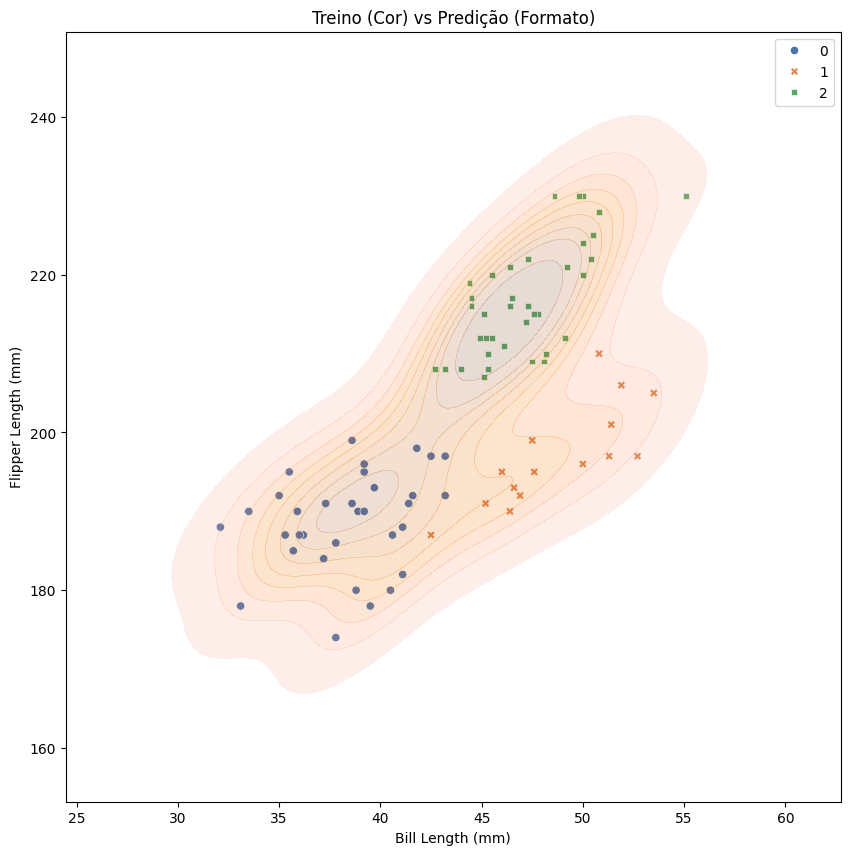

In [ ]:
y_test_flat = y_test.values.ravel()
y_pred_flat = y_pred3.ravel()

plt.figure(figsize=(10, 10))
sns.scatterplot(x=x_test['bill_length_mm'], y=x_test['flipper_length_mm'], hue=y_test_flat, style=y_pred_flat, palette='deep')
sns.kdeplot(x=x_test['bill_length_mm'], y=x_test['flipper_length_mm'], fill=True, alpha=0.2)
plt.xlabel('Bill Length (mm)')
plt.ylabel('Flipper Length (mm)')
plt.title('Treino (Cor) vs Predição (Formato)')
plt.show()

# Exercício 10: Reflexão Crítica

### Baseado nos exercícios anteriores, escreva um breve texto discutindo os desafios encontrados ao criar um modelo de Machine Learning e como cada etapa do processo é crucial para o sucesso do projeto.

Ao executar esta tarefa fica claro que as etapas de pré-tratamento dos dados, seleção de features e a calibração dos parâmetros do modelo são etapas de igual importância, que demandam o mesmo nível de atenção dentro do ciclo de desenvolvimento. Acelerar as primeiras etapas para pular ao treino seria uma ação imprudente e que consequentemente acarretará em modelos de baixa performance. Neste caso específico, em um primeiro teste, utilizei todas as features do dataset para treinar o modelo, e posteriormente fiz o teste somente com as duas que entendi como mais importantes, e obtive um resultado muito melhor apenas.